In [863]:
import pandas as pd
import warnings
import numpy as np
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from sklearn.ensemble import IsolationForest
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

#### Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

In [376]:
# Loading our data
purchases_behaviour = pd.read_csv("datasets/QVI_purchase_behaviour.csv")
transactions_data = pd.read_csv("datasets/QVI_transaction_data.csv")

In [377]:
purchases_behaviour.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [378]:
transactions_data.head(5)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


- Let's start with checking our datasets for missing or invalid values

In [379]:
purchases_behaviour.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [380]:
transactions_data.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

Check outliers for two columns 'TOT_SALES' and 'PROD_QTY' let's focus on them

- Let's check datasets for outliers - Using Standard Deviation (Z-score Method)

In [381]:
mean = transactions_data['TOT_SALES'].mean()
std = transactions_data['TOT_SALES'].std()

# Define outlier threshold
z_scores = (transactions_data['TOT_SALES'] - mean) / std
outliers = transactions_data[np.abs(z_scores) > 4]
outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
11,43332,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0
72,43331,96,96203,96025,7,Smiths Crinkle Original 330g,5,28.5
5107,43329,54,54225,48172,46,Kettle Original 175g,5,27.0
5109,43330,57,57122,51950,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,5,23.0
5160,43600,82,82189,81669,46,Kettle Original 175g,5,27.0
...,...,...,...,...,...,...,...,...
238331,43328,217,217089,216708,59,Old El Paso Salsa Dip Tomato Med 300g,4,20.4
238372,43327,231,231205,234528,88,Kettle Honey Soy Chicken 175g,4,21.6
238395,43604,238,238250,242874,88,Kettle Honey Soy Chicken 175g,5,27.0
238490,43331,272,272037,269678,46,Kettle Original 175g,4,21.6


C:\Users\Bagdo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



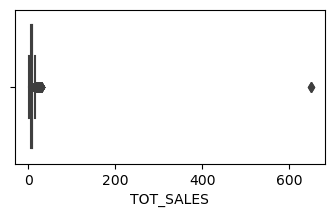

In [382]:
plt.figure(figsize=(4, 2))
sns.boxplot(x=transactions_data['TOT_SALES'])
plt.show()

Based on the Z-score method and the plot, there are several outliers \
that significantly stand out from the rest of the instances

In [383]:
# ISO-Forest Machine Learning apporach to find outliers
iso_forest = IsolationForest(contamination=0.009)  # Adjust contamination level
transactions_data['anomaly'] = iso_forest.fit_predict(transactions_data[['TOT_SALES']])
outliers = transactions_data[transactions_data['anomaly'] == -1]
outliers

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,anomaly
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,-1
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,-1
11,43332,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0,-1
13,43329,13,13213,12447,92,WW Crinkle Cut Chicken 175g,1,1.7,-1
31,43600,43,43227,40186,26,Pringles Sweet&Spcy BBQ 134g,4,14.8,-1
...,...,...,...,...,...,...,...,...,...
264678,43554,265,265111,263428,35,Woolworths Mild Salsa 300g,1,1.5,-1
264720,43479,266,266318,264144,105,Woolworths Cheese Rings 190g,1,1.8,-1
264736,43297,268,268011,264411,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7,-1
264747,43288,268,268210,264624,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7,-1


In [384]:
transactions_data = transactions_data[transactions_data['anomaly'] != -1]
transactions_data.drop(columns=['anomaly'], inplace=True)  # Remove the anomaly column

C:\Users\Bagdo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



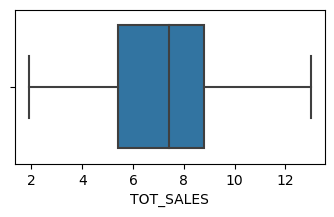

In [385]:
plt.figure(figsize=(4, 2))
sns.boxplot(x=transactions_data['TOT_SALES'])
plt.show()

C:\Users\Bagdo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



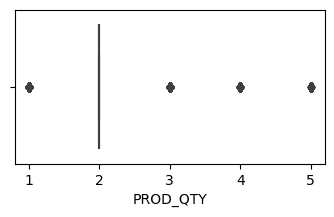

In [386]:
plt.figure(figsize=(4, 2))
sns.boxplot(x=transactions_data['PROD_QTY'])
plt.show()

- Let's check the data types of each column we have in both datasets

In [20]:
print(transactions_data.dtypes)

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object


In [103]:
print(purchases_behaviour.dtypes)

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object


Date column has wrong type

In [387]:
transactions_data['DATE'] = pd.to_datetime(transactions_data['DATE'], origin='1899-12-30', unit='D')

- For the next step Let's look at the Product name column 

In [388]:
transactions_data['PROD_NAME'].unique()[:10]

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Twisties Cheese     270g', 'Thins Chips Light&  Tangy 175g'],
      dtype=object)

Since we need ony Chips. Let's remove the Salsa products

In [389]:
transactions_data = transactions_data[~transactions_data['PROD_NAME'].str.contains('salsa', case=False, na=False)]

In [390]:
agg_products = transactions_data.groupby('PROD_NAME').agg({
    'PROD_QTY': ['min', 'max', 'mean'],  # Min, Max, Mean for quantity
    'TOT_SALES': ['min', 'max', 'mean']     # Min, Max, Mean for sales
})
agg_products

PROD_QTY               TOT_SALES        \
                                            min max      mean       min   max   
PROD_NAME                                                                       
Burger Rings 220g                             1   5  1.898977       2.3  11.5   
CCs Nacho Cheese    175g                      1   5  1.895194       2.1  10.5   
CCs Original 175g                             1   5  1.902246       2.1  10.5   
CCs Tasty Cheese    175g                      1   5  1.877843       2.1  10.5   
Cheetos Chs & Bacon Balls 190g                1   3  1.883152       3.3   9.9   
...                                         ...  ..       ...       ...   ...   
WW Original Corn    Chips 200g                1   5  1.889632       1.9   9.5   
WW Original Stacked Chips 160g                1   5  1.884331       1.9   9.5   
WW Sour Cream &OnionStacked Chips 160g        1   5  1.889413       1.9   9.5   
WW Supreme Cheese   Corn Chips 200g           1   5  1.880053       1.9   9.5   
Woolworths Cheese   Rings 190g                2   5  2.011186       3.6   9.0   

                                                  
                                            mean  
PROD_NAME                                         
Burger Rings 220g                       4.367647  
CCs Nacho Cheese    175g                3.979907  
CCs Original 175g                       3.994716  
CCs Tasty Cheese    175g                3.943470  
Cheetos Chs & Bacon Balls 190g          6.214402  
...                                          ...  
WW Original Corn    Chips 200g          3.590301  
WW Original Stacked Chips 160g          3.580229  
WW Sour Cream &OnionStacked Chips 160g  3.589885  
WW Supreme Cheese   Corn Chips 200g     3.572101  
Woolworths Cheese   Rings 190g          3.620134  

[105 rows x 6 columns]

Top Five most popular Chips Brands

In [391]:
transactions_data.groupby('PROD_NAME')['PROD_NAME'].count()[:5]

PROD_NAME
Burger Rings 220g                 1564
CCs Nacho Cheese    175g          1498
CCs Original 175g                 1514
CCs Tasty Cheese    175g          1539
Cheetos Chs & Bacon Balls 190g    1472
Name: PROD_NAME, dtype: int64

- Let's Filter out the the dataset based on the number of transactions per loyalty card number

In [392]:
transcat_counts = transactions_data.groupby('LYLTY_CARD_NBR')['LYLTY_CARD_NBR'].count()
transcat_counts.unique()

array([ 1,  2,  3,  4,  5,  7,  6,  9,  8, 13, 10, 11, 12, 14, 16, 15, 17],
      dtype=int64)

C:\Users\Bagdo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



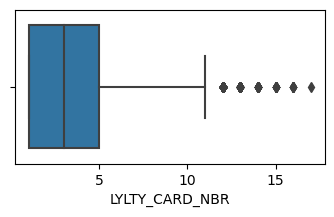

In [393]:
plt.figure(figsize=(4, 2))
sns.boxplot(x=transcat_counts)
plt.show()

- Let's count number of transactions by date

In [394]:
transcat_counts_by_date = transactions_data.groupby('DATE')['LYLTY_CARD_NBR'].count().reset_index(name='transaction_count')
transcat_counts_by_date

,DATE,transaction_count
0,2018-07-01,663
1,2018-07-02,649
2,2018-07-03,672
3,2018-07-04,668
4,2018-07-05,659
...,...,...
359,2019-06-26,656
360,2019-06-27,667
361,2019-06-28,671
362,2019-06-29,702


There's only 364 rows, meaning only 364 dates which indicates a missing date. \
Let's create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a  \
chart of number of transactions over time to find the missing date \

In [395]:
# Step 1: Create a sequence of dates from 1st July 2018 to 30th June 2019
date_seq = pd.date_range(start="2018-07-01", end="2019-06-30", freq="D")
date_seq = pd.DataFrame(date_seq, columns=['DATE'])

In [396]:
# Step 2: Merge the created DataFrame with our transactions by date dataFrame
merged_data = pd.merge(date_seq, transcat_counts_by_date, on='DATE', how='left')

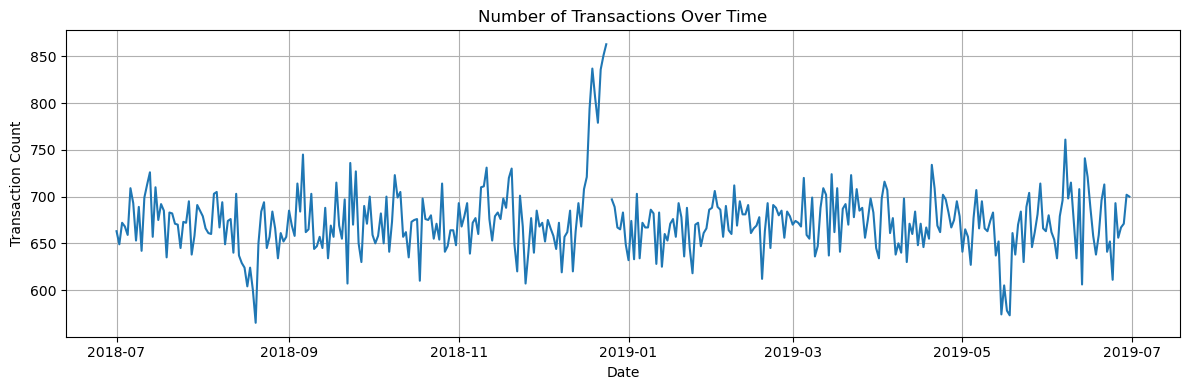

In [397]:
# Step 3: Plot the number of transactions over time
plt.figure(figsize=(12, 4))
plt.plot(merged_data['DATE'], merged_data['transaction_count'])
plt.title("Number of Transactions Over Time")
plt.xlabel("Date")
plt.ylabel("Transaction Count")
plt.grid(True)

plt.tight_layout()
plt.show()

We can see that there is an increase in purchases in December and a break in late 
December. Let's zoom in on this.

In [398]:
# Extracting the December from the merged dataFrame
december_data = merged_data[(merged_data['DATE'] >= '2018-12-01') & (merged_data['DATE'] <= '2018-12-31')]

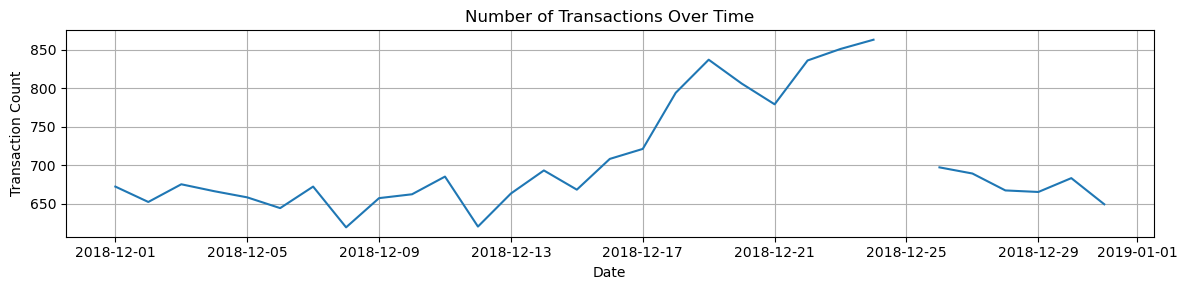

In [399]:
plt.figure(figsize=(12, 3))
plt.plot(december_data['DATE'], december_data['transaction_count'])
plt.title("Number of Transactions Over Time")
plt.xlabel("Date")

plt.ylabel("Transaction Count")
plt.grid(True)

plt.tight_layout()
plt.show()

We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. \
This is due to shops being closed on Christmas day.

- Feature Engineering

- Let's create a new feature called 'pack size' which will take the weight portion of the prodcut extracted from PROD_NAME

In [400]:
transactions_data['PACK_SIZE'] = transactions_data['PROD_NAME'].apply(lambda x: x[-4:-1])

In [401]:
transactions_data['PACK_SIZE'] = transactions_data['PROD_NAME'].str.extract('(\d+)')

In [402]:
transactions_data['PACK_SIZE'].unique()

array(['175', '170', '330', '210', '150', '270', '220', '125', '110',
       '134', '380', '165', '135', '250', '200', '160', '190', '180',
       '70', '90'], dtype=object)

In [403]:
fig = px.histogram(transactions_data, x='PACK_SIZE')
fig.update_layout( width = 700, height = 300)
fig.show(renderer='iframe')

- the most frequent package size is 175 grams
- the highest one is 380 grams
- the smallest is 70 grams

- Let's create a new feature 'BRAND' which will take the Chip's brand name from PROD_NAME column

In [404]:
transactions_data['BRAND'] = transactions_data['PROD_NAME'].str.split().str[0]

Some of the brand names look like they are of the same brands - such as RED and \
RRD, which are both Red Rock Deli chips. Dorito and Doritos. Snbts and Sunbites Let's combine these together.

In [405]:
transactions_data['BRAND'] = transactions_data['BRAND'].replace({'RED': 'RRD','Dorito':'Doritos','Snbts':'Sunbites'})

In [406]:
transactions_data['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Grain', 'Doritos', 'Twisties',
       'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns', 'Kettle', 'Red',
       'Pringles', 'Infuzions', 'Smith', 'Tyrrells', 'Cobs', 'French',
       'RRD', 'WW', 'Tostitos', 'Cheetos', 'GrnWves', 'Sunbites',
       'Woolworths'], dtype=object)

- Now that we are happy with the transaction dataset, let's have a look at the 
customer dataset.

In [407]:
# Let's Merge two datasets
merged_df = pd.merge(transactions_data, purchases_behaviour,  on = "LYLTY_CARD_NBR", how = "left")

In [408]:
merged_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [409]:
merged_df.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
PACK_SIZE           0
BRAND               0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

**Data analysis on customer segments** \
Now that the data is ready for analysis, we can define some metrics of interest to 
the client: 
- Who spends the most on chips (total sales), describing customers by lifestage and
 how premium their general purchasing behaviour is
 - How many customers are in each segment
 - How many chips are bought per customer by segment
 - What's the average chip price by customer segment
 - The customer's total spend over the period and total spend for each transaction 
to understand what proportion of their grocery spend is on chips 
- Proportion of customers in each customer segment overall to compare against the 
mix of customers who purchase chips


Let's start with calculating total sales by LIFESTAGE and PREMIUM_CUSTOMER and \
plotting the split by these segments to describe which customer segment contribute 
most to chip sales.

In [410]:
total_sales_by_permium = merged_df.groupby('PREMIUM_CUSTOMER').agg({'TOT_SALES':'sum'}).reset_index()                                      

In [411]:
total_sales_by_lifestage = merged_df.groupby('LIFESTAGE').agg({'TOT_SALES':'sum'}).reset_index()

In [412]:
total_sales_by_customers =  merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()

In [413]:
total_sales_by_lifestage

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,171062.85
1,NEW FAMILIES,47069.40
2,OLDER FAMILIES,325505.65
3,OLDER SINGLES/COUPLES,372765.85
4,RETIREES,339728.95
5,YOUNG FAMILIES,292134.85
6,YOUNG SINGLES/COUPLES,242035.20


In [414]:
fig = px.bar(total_sales_by_permium , x='PREMIUM_CUSTOMER', y='TOT_SALES')
fig.update_layout( width = 400, height = 350)
fig.show(renderer='iframe')

In [415]:
fig = px.bar(total_sales_by_lifestage, x='LIFESTAGE', y='TOT_SALES')
fig.update_layout( width = 1000, height = 450)
fig.show(renderer='iframe')

In [416]:
fig = px.histogram(total_sales_by_customers , x="LIFESTAGE", y="TOT_SALES",
             color='PREMIUM_CUSTOMER', barmode='group',
             height=400)
fig.show(renderer='iframe')

- The highest sales in Premium Segment has 'OLDER SINGLES/COUPLES' category. Moreover this is most balanced category of customers.
- The highest sales in Mainstream Segment has 'YOUNG SINGLES/COUPLES' category.
- The highest sales in Budget Segment has 'OLDER FAMILIES' category.
- The lowest sales in all three Segments has 'NEW FAMILIES'!

Higher sales may also be driven by more units of chips being bought per customer. 
Let's have a look at this next

In [417]:
avg_units_by_customers =  merged_df.groupby(['LIFESTAGE','PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()
avg_units_by_customers

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,8792
1,MIDAGE SINGLES/COUPLES,Mainstream,21040
2,MIDAGE SINGLES/COUPLES,Premium,14275
3,NEW FAMILIES,Budget,5204
4,NEW FAMILIES,Mainstream,4021
5,NEW FAMILIES,Premium,2751
6,OLDER FAMILIES,Budget,41512
7,OLDER FAMILIES,Mainstream,25557
8,OLDER FAMILIES,Premium,20042
9,OLDER SINGLES/COUPLES,Budget,32598


In [55]:
fig = px.histogram(avg_units_by_customers, x="LIFESTAGE", y="PROD_QTY",
             color='PREMIUM_CUSTOMER', barmode='group',
             height=400)
fig.show(renderer='iframe')

- Older families and young families in general buy more chips per customer

**Let's also investigate the average price per unit chips bought for each customer \
segment as this is also a driver of total sales**

In [418]:
# Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER
#Step 1: Calculate total sales and total quantity for each segment
segment_sales = merged_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg({'TOT_SALES': 'sum', 'PROD_QTY': 'sum'}).reset_index()
#Step 2: Calculate average price per unit chips 
segment_sales['AVG_PRICE'] = segment_sales['TOT_SALES'] / segment_sales['PROD_QTY'] 


In [57]:
segment_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PROD_QTY,AVG_PRICE
0,MIDAGE SINGLES/COUPLES,Budget,33032.70,8792,3.757131
1,MIDAGE SINGLES/COUPLES,Mainstream,84022.20,21040,3.993451
2,MIDAGE SINGLES/COUPLES,Premium,54007.95,14275,3.783394
3,NEW FAMILIES,Budget,20492.55,5204,3.937846
4,NEW FAMILIES,Mainstream,15872.25,4021,3.947339
5,NEW FAMILIES,Premium,10704.60,2751,3.891167
6,OLDER FAMILIES,Budget,155525.15,41512,3.746511
7,OLDER FAMILIES,Mainstream,95468.00,25557,3.735493
8,OLDER FAMILIES,Premium,74512.50,20042,3.717818
9,OLDER SINGLES/COUPLES,Budget,126711.30,32598,3.887088


In [58]:
fig = px.histogram(segment_sales, x="LIFESTAGE", y="AVG_PRICE",
             color='PREMIUM_CUSTOMER', barmode='group',
             height=400)
fig.show(renderer='iframe')

As the difference in average price per unit isn't large, we can check if this difference is statistically different

 Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples

In [419]:
# Filter for mainstream and premium customers
mainstream = merged_df[merged_df['PREMIUM_CUSTOMER'] == 'Mainstream']['PROD_QTY']
premium = merged_df[merged_df['PREMIUM_CUSTOMER'] == 'Premium']['PROD_QTY']

# Perform t-test
t_stat, p_value = ttest_ind(mainstream, premium, equal_var=False)  # Assume unequal variances
print(f"T-test Mainstream vs Premium: t-stat={t_stat:.3f}, p-value={p_value:.3f}")

T-test Mainstream vs Premium: t-stat=-3.488, p-value=0.000


The t-test results in a p-value of 0.016, i.e. the unit price for mainstream, \
young and mid-age singles and couples [ARE / ARE NOT] significantly higher than \
that of budget or premium, young and midage singles and couples.

We might want to target customer segments that contribute the most to sales to \
retain them or further increase sales. Let's look at Mainstream - young \
singles/couples. For instance, let's find out if they tend to buy a particular \ 
brand of chips.

In [420]:
young_mainstream = merged_df[(merged_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (merged_df['PREMIUM_CUSTOMER'] == 'Mainstream')]

In [421]:
top_brands = young_mainstream.groupby('BRAND')['BRAND'].count().sort_values(ascending=False).reset_index(name='count')[:5]

In [62]:
fig = px.bar(top_brands, x='BRAND', y='count')
fig.update_layout( width = 450, height = 350)
fig.show(renderer='iframe')

Kettle is the most popular brand among the customer's category who buy most of Chips

- Let's also find out if our target segment tends to buy larger packs of chips.

In [63]:
pack_size = young_mainstream.groupby('PACK_SIZE')['PACK_SIZE'].count().sort_values(ascending=False).reset_index(name='count')

In [64]:
fig = px.bar(pack_size , x='PACK_SIZE', y='count')
fig.update_layout( width = 700, height = 350)
fig.show(renderer='iframe')

#### Quantium Virtual Internship - Retail Strategy and Analytics - Task 2

In [701]:
merged_df.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEAR_MONTH
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,2018-10
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2019-05
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,2019-05


Top Five Stores based on Total Sales

In [702]:
top_stores = merged_df.groupby('STORE_NBR').agg({'TOT_SALES':'sum'}).sort_values(by = 'TOT_SALES', ascending = False).reset_index()[:5]
top_stores

,STORE_NBR,TOT_SALES
0,226,16382.55
1,88,15320.75
2,165,14959.15
3,237,14755.60
4,40,14339.20


The client has selected store numbers 77, 86 and 88 as trial stores and want \
control stores to be established stores that are operational for the entire \
observation period.\
\
We would want to match trial stores to control stores that are similar to the trial \
store prior to the trial period of Feb 2019 in terms of:

- Monthly overall sales revenue 
- Monthly number of customers 
- Monthly number of transactions per customer

- Step.1 : Calculate Metrics for All Stores Before the Trial (Pre-Trial Period) 

Monthly overall sales revenue

In [791]:
# new column year-month
merged_df['YEAR_MONTH'] = merged_df['DATE'].dt.to_period('M')

In [892]:
pre_trial_records = merged_df[(merged_df['DATE'] < '2019-02-01')]

In [893]:
pre_trial_sales_revenue = pre_trial_records.groupby(['STORE_NBR','YEAR_MONTH'])['TOT_SALES'].sum().reset_index()
pre_trial_number_customers = pre_trial_records.groupby(['STORE_NBR','YEAR_MONTH'])['LYLTY_CARD_NBR'].count().reset_index()
pre_trial_number_txn = pre_trial_records.groupby(['STORE_NBR', 'YEAR_MONTH'])['TXN_ID'].nunique().reset_index(name = 'Number_of_TXN')

In [894]:
pre_trial_records = pd.merge(pre_trial_sales_revenue, pre_trial_number_customers, on = ['STORE_NBR','YEAR_MONTH'], how ='inner')
pre_trial_records = pd.merge(pre_trial_records, pre_trial_number_txn, on = ['STORE_NBR','YEAR_MONTH'], how ='inner')

Now we need to work out a way of ranking how similar each potential control store is to the trial store. \
We can calculate how correlated the performance of each store is to the trial store. \
Let's write a function for this so that we don't have to calculate this for each trial store and control store pair.

Calculates the standardized magnitude distance between a trial store and all potential control stores. \
$D = \sqrt{\sum_{t=1}^{T}(Z_{trial} - Z_{control})^2}$

In [708]:
"""
Parameters:
input_table (pd.DataFrame): The table containing store metrics.
metric_col (str): The column name for the metric used in distance calculation.
store_comparison (int): The trial store number to compare against.

Returns:
pd.DataFrame: A table with control stores and their magnitude distance values.
"""
def calculate_magnitude_distance(input_table, metric_col, store_comparison):

    # Calculate mean and standard deviation for standardization
    mean_metric = input_table[metric_col].mean()
    std_metric = input_table[metric_col].std()

    # Standardize the metric for all stores
    input_table['standardized_metric'] = (input_table[metric_col] - mean_metric) / std_metric

    # Extract trial store data and set index to YEAR_MONTH
    trial_store_records = input_table[input_table['STORE_NBR'] == store_comparison].set_index('YEAR_MONTH')['standardized_metric']

    # Initialize results list
    distance_results = []

    # Loop through each control store
    for control_store in input_table['STORE_NBR'].unique():
        if control_store != store_comparison:
            control_store_records = input_table[input_table['STORE_NBR'] == control_store].set_index('YEAR_MONTH')['standardized_metric']

            # Align both Series by common months
            common_months = trial_store_records.index.intersection(control_store_records.index)

            if len(common_months) > 0:  # Ensure we have common time periods
                trial_values = trial_store_records.loc[common_months].values
                control_values = control_store_records.loc[common_months].values

                # Compute magnitude distance (Euclidean norm)
                magnitude_distance = np.linalg.norm(trial_values - control_values)

                # Append results
                distance_results.append({'Trial_Store': store_comparison, 'Control_Store': control_store, 'Magnitude_Distance': magnitude_distance})

    # Convert results to DataFrame
    return pd.DataFrame(distance_results)

 Calculates the correlation between a trial store and all potential control stores.

In [777]:
"""
Parameters:
input_table (pd.DataFrame): The table containing store metrics.
metric_col (str): The column name for the metric used in correlation calculation.
store_comparison (int): The trial store number to compare against.

Returns:
pd.DataFrame: A table with control stores and their correlation values.
"""

def calculate_correlation(input_table, metric_col, store_comparison):
    # Extract trial store data and select only the relevant columns
    trial_store_data = input_table[input_table['STORE_NBR'] == store_comparison][['YEAR_MONTH', metric_col]]

    # Initialize an empty list to store results
    correlation_results = []

    # Loop through each control store
    for control_store in input_table['STORE_NBR'].unique():
        if control_store != store_comparison:  # Exclude the trial store itself
            # Extract control store data and select only the relevant columns
            control_store_data = input_table[input_table['STORE_NBR'] == control_store][['YEAR_MONTH', metric_col]]

            # Merge on YEAR_MONTH to ensure alignment
            merged_data = pd.merge(trial_store_data, control_store_data, on='YEAR_MONTH', suffixes=('_trial', '_control'))

            # Drop rows with missing values
            merged_data.dropna(inplace=True)

            # Check if both series have more than one unique value before calculating correlation
            if len(merged_data[f'{metric_col}_trial'].unique()) > 1 and len(merged_data[f'{metric_col}_control'].unique()) > 1:
                # Calculate correlation
                correlation = merged_data[f'{metric_col}_trial'].corr(merged_data[f'{metric_col}_control'])
            else:
                correlation = np.nan  # Not enough variability, set to NaN

            # Append results
            correlation_results.append({'Trial_Store': store_comparison, 'Control_Store': control_store, 'Correlation': correlation})

    # Convert results to a DataFrame
    correlation_df = pd.DataFrame(correlation_results)

    return correlation_df

In [825]:
# Function to compute final ranking score
def compute_final_score(correlation_df, magnitude_df):
    """
    Merge correlation and magnitude distance DataFrames and compute final score.
    """
    combined_df = pd.merge(correlation_df, magnitude_df, on=['Trial_Store', 'Control_Store'])

    # Calculate final score: More correlation is better, smaller magnitude distance is better
    combined_df['Final_Score'] = (0.5 * combined_df['Correlation']) + (0.5 * (1 - combined_df['Magnitude_Distance']))

    return combined_df

# Step 1: Compute Correlation & Magnitude Distance for all metrics
metrics = ['TOT_SALES', 'LYLTY_CARD_NBR', 'Number_of_TXN']
trial_stores = [77, 86, 88]  # Example trial stores
final_results = []

for metric in metrics:
    for trial_store in trial_stores:
        # Compute correlation and magnitude distance for each metric and each trial store
        correlation_df = calculate_correlation(input_table, metric, trial_store)
        magnitude_df = calculate_magnitude_distance(input_table, metric, trial_store)

        # Merge and compute final score for this metric
        final_metric_df = compute_final_score(correlation_df, magnitude_df)

        # Store results with metric name
        final_metric_df['Metric'] = metric
        final_results.append(final_metric_df)

# Step 2: Combine results for all three metrics
final_results_df = pd.concat(final_results)

# Step 3: Compute the overall final score by averaging across all three metrics
overall_final_score = final_results_df.groupby(['Trial_Store', 'Control_Store']).agg(
    Final_Score=('Final_Score', 'mean')  # Averaging across metrics
).reset_index()

# Step 4: Rank control stores for each trial store
overall_final_score['Rank'] = overall_final_score.groupby('Trial_Store')['Final_Score'].rank(ascending=False)

# Step 5: Select the best control store for each trial store
best_control_stores = overall_final_score.loc[overall_final_score.groupby('Trial_Store')['Final_Score'].idxmax()]

# Display final best control store matches
best_control_stores


,Trial_Store,Control_Store,Final_Score,Rank
228,77,233,0.885298,1.0
420,86,155,0.735262,1.0
768,88,237,0.366185,1.0


In [880]:
def plot_bar(metric):
    g = sns.catplot(data=comparison, kind="bar",
                    x="YEAR_MONTH", y=metric, hue="STORE_NBR",
                    errorbar="sd", palette="dark", alpha=.6, height=6)
    g.figure.set_size_inches(6, 2)
    g.set_axis_labels("", metric)
    g.legend.set_title("")

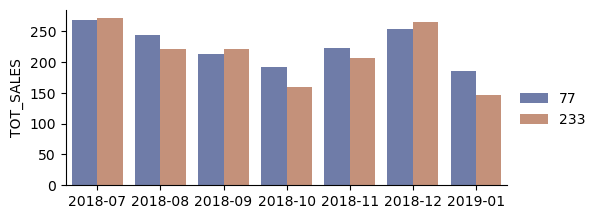

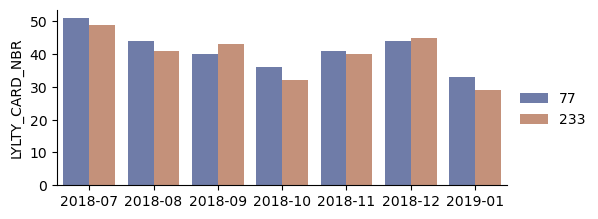

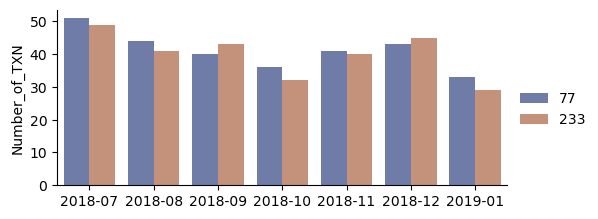

In [881]:
comparison = pre_trial_records[(pre_trial_records['STORE_NBR'] == 233) | (pre_trial_records['STORE_NBR'] == 77)]
for metric in metrics:
    plot_bar(metric)
    warnings.simplefilter(action='ignore', category=FutureWarning)

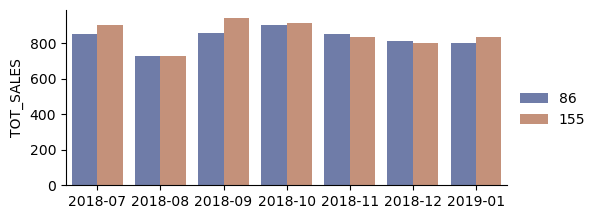

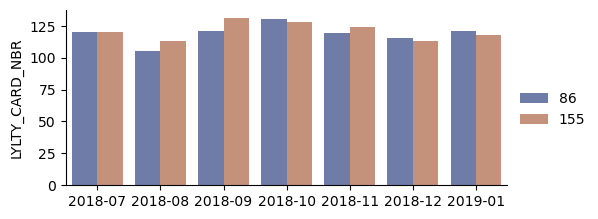

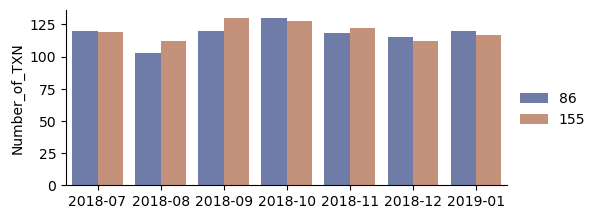

In [882]:
comparison = pre_trial_records[(pre_trial_records['STORE_NBR'] == 86) | (pre_trial_records['STORE_NBR'] == 155)]
for metric in metrics:
    plot_bar(metric)
    warnings.simplefilter(action='ignore', category=FutureWarning)

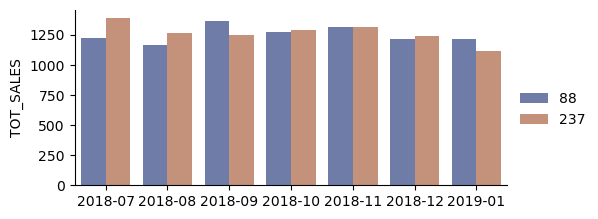

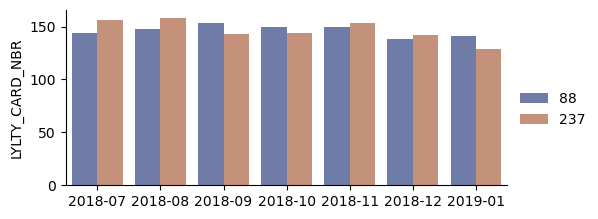

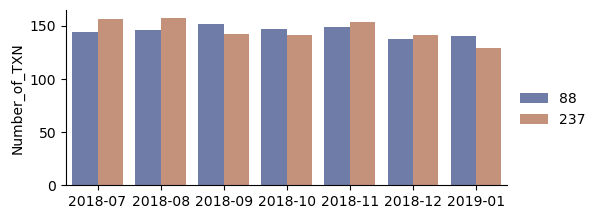

In [883]:
comparison = pre_trial_records[(pre_trial_records['STORE_NBR'] == 88) | (pre_trial_records['STORE_NBR'] == 237)]
for metric in metrics:
    plot_bar(metric)
    warnings.simplefilter(action='ignore', category=FutureWarning)

Seems like the chosen control sales really match their trial stores pairs. 

The trial period goes from the start of February 2019 to April 2019. \
We now want to see if there has been an uplift in overall chip sales. 

Let's take the records in period form February 2019 up to April 2019 and compare the chosen control stores with our trial stores \
and see if there is more difference now in terms of Sales, Customers and etc

In [896]:
trial_records = merged_df[(merged_df['DATE'] >= '2019-02-01') & (merged_df['DATE'] <= '2019-04-01')]

In [888]:
trial_sales_revenue = trial_records.groupby(['STORE_NBR','YEAR_MONTH'])['TOT_SALES'].sum().reset_index()
trial_number_customers = trial_records.groupby(['STORE_NBR','YEAR_MONTH'])['LYLTY_CARD_NBR'].count().reset_index()
trial_number_txn = trial_records.groupby(['STORE_NBR', 'YEAR_MONTH'])['TXN_ID'].nunique().reset_index(name = 'Number_of_TXN')

In [898]:
trial_records = pd.merge(trial_sales_revenue, trial_number_customers, on = ['STORE_NBR','YEAR_MONTH'], how ='inner')
trial_records = pd.merge(trial_records, trial_number_txn, on = ['STORE_NBR','YEAR_MONTH'], how ='inner')

In [899]:
trial_records

,STORE_NBR,YEAR_MONTH,TOT_SALES,LYLTY_CARD_NBR,Number_of_TXN
0,1,2019-02,192.9,50,50
1,1,2019-03,183.4,46,46
2,1,2019-04,4.6,1,1
3,2,2019-02,133.4,29,29
4,2,2019-03,174.0,41,41
...,...,...,...,...,...
735,271,2019-03,699.6,96,96
736,271,2019-04,28.0,5,5
737,272,2019-02,385.3,47,47
738,272,2019-03,421.9,51,51


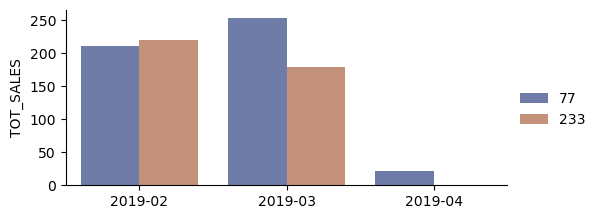

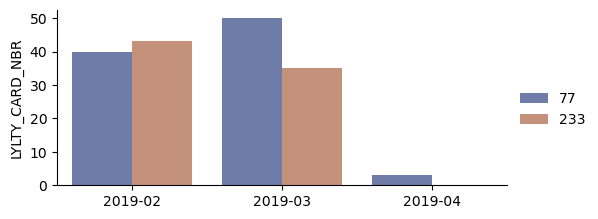

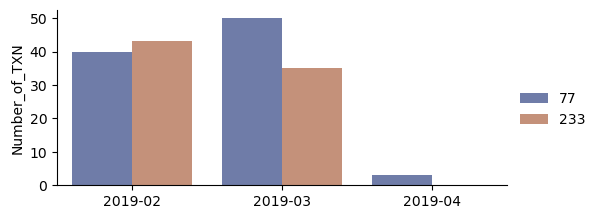

In [914]:
comparison = trial_records[(trial_records['STORE_NBR'] == 77) | (trial_records['STORE_NBR'] == 233)]
for metric in metrics:
    plot_bar(metric)
    warnings.simplefilter(action='ignore', category=FutureWarning)

We could see the significant increase customers visitations during the trial for trial stores comapring to the pre-trial records

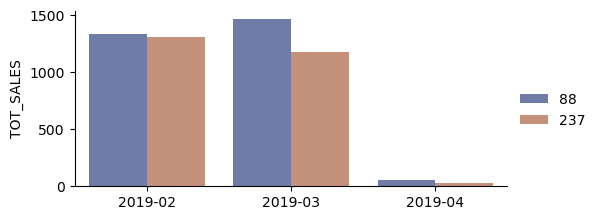

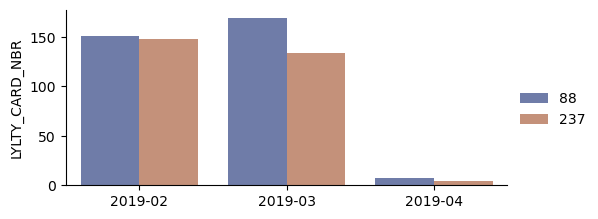

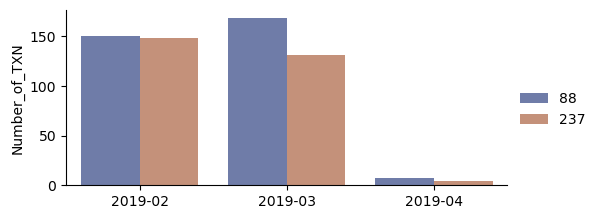

In [915]:
comparison = trial_records[(trial_records['STORE_NBR'] == 88) | (trial_records['STORE_NBR'] == 237)]
for metric in metrics:
    plot_bar(metric)
    warnings.simplefilter(action='ignore', category=FutureWarning)

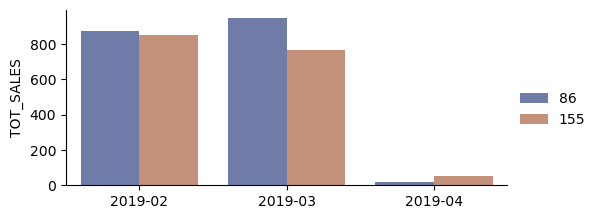

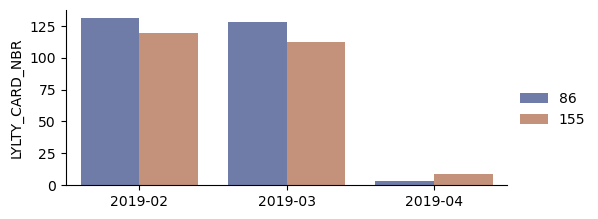

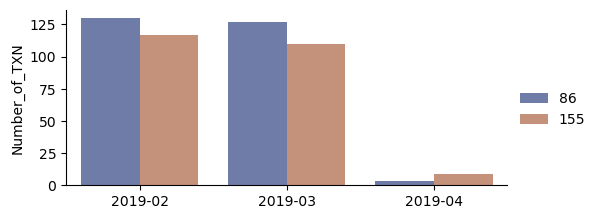

In [916]:
comparison = trial_records[(trial_records['STORE_NBR'] == 86) | (trial_records['STORE_NBR'] == 155)]
for metric in metrics:
    plot_bar(metric)
    warnings.simplefilter(action='ignore', category=FutureWarning)